In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
import itertools as it

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
# import seaborn as sns

from cibinfo.powerspectra import autopower as cc

# Initiate models

In [4]:
model = cc.PaoloModel(freq1=545)
planck2014 = cc.Planck2014(freq1=545)

# Check properties

In [29]:
# Units for the two
print(model.unit)
print(planck2014.unit)

Jy^2/sr
Jy^2/sr


We now check for the shotnoise contribution. It turns out that the 2014 Planck data release removed the shot noise term from the $C_l$, but these values are known. If we want to compare the two data sets, we thus need to add the shot noise back to the $C_l$.

In [11]:
print(model.Cl_contains_SN)
print(planck2014.Cl_contains_SN)
print(planck2014.S)

True
False
1690


# Plot first power spectrum

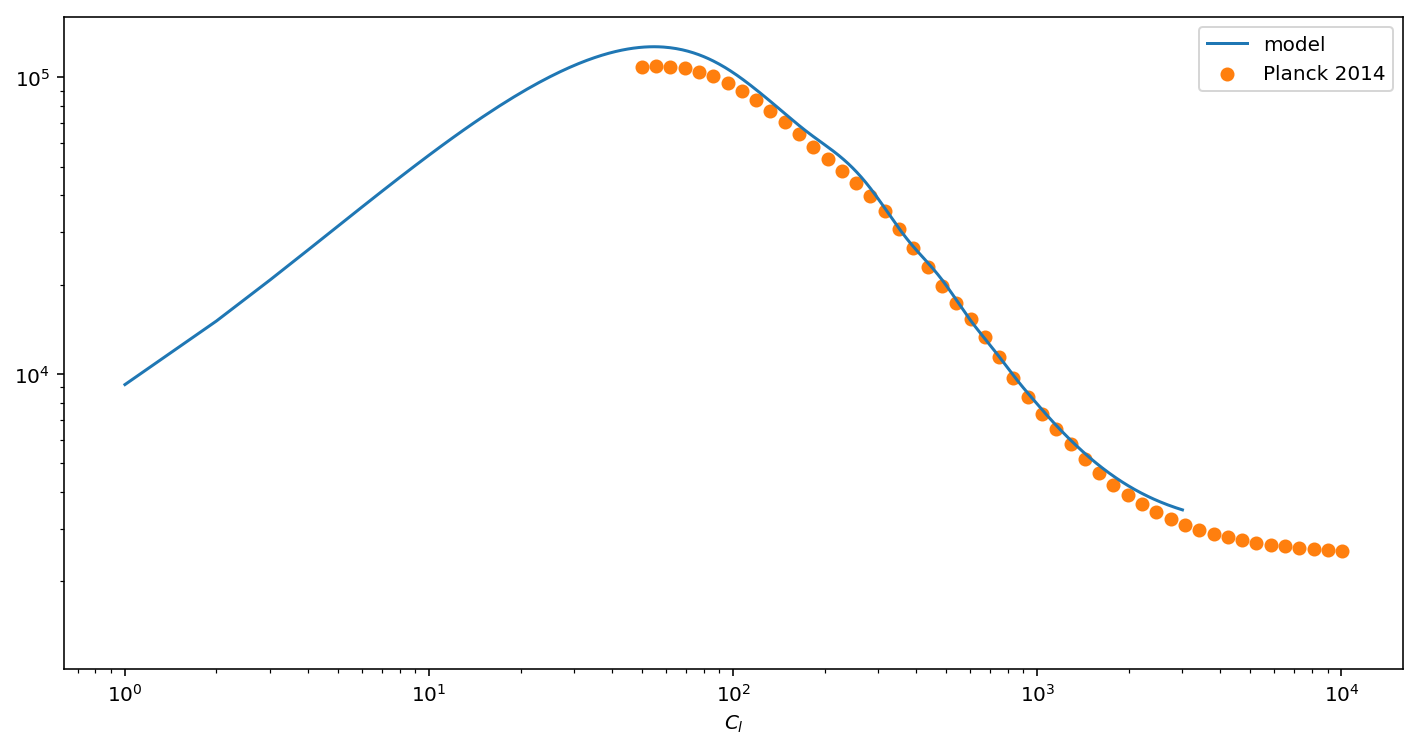

In [7]:
plt.plot(model.l, model.Cl, label='model')
plt.scatter(planck2014.l, planck2014.Cl + planck2014.S, label='Planck 2014', c='C1')

# labels & legend
plt.xlabel(r'$l$')
plt.ylabel(r'$C_l$')
plt.legend()
plt.loglog();

# Multi-frequency

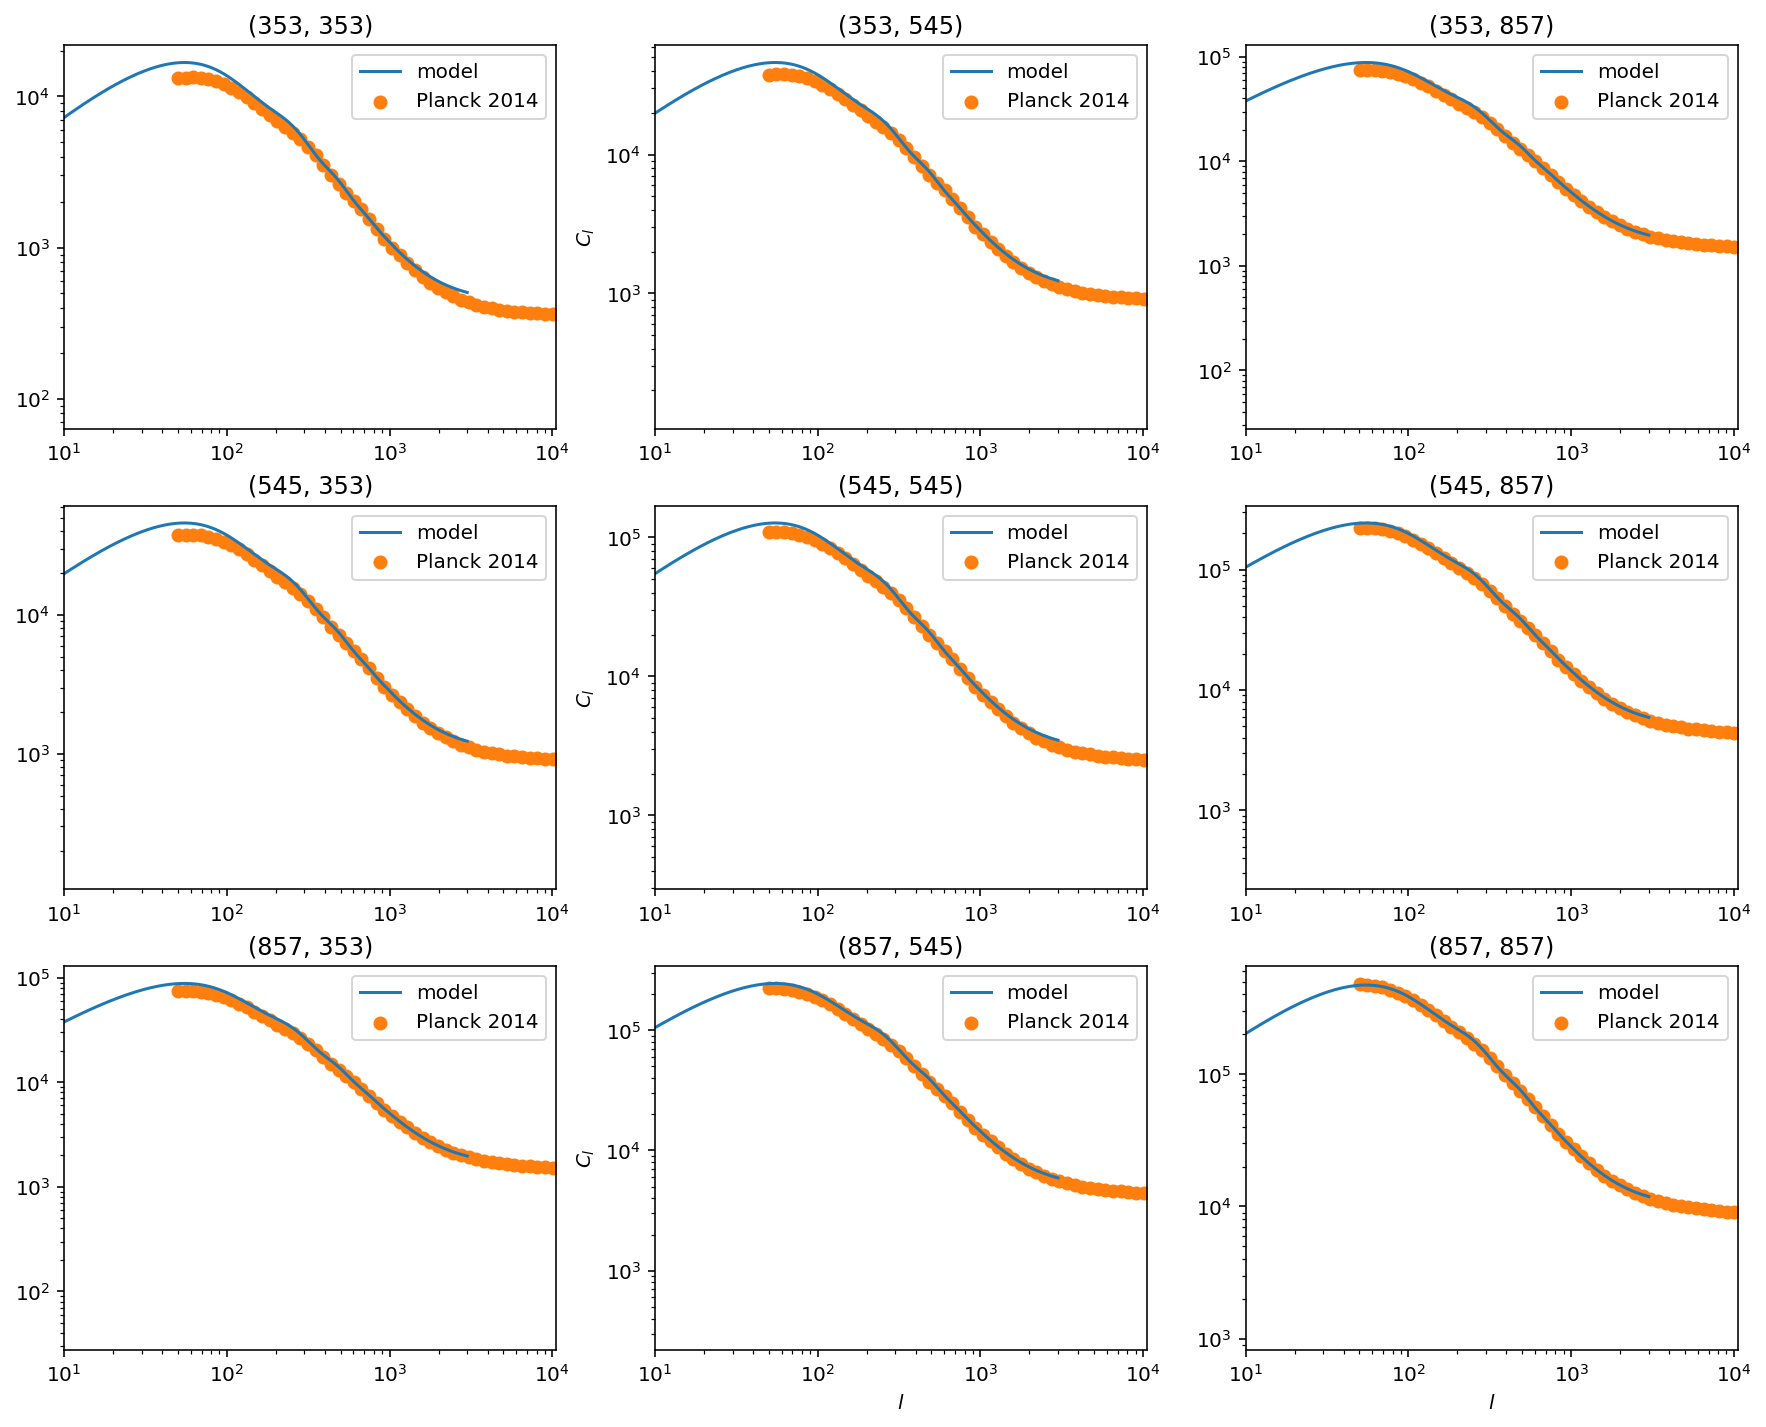

In [28]:
fig = plt.figure(figsize=(15, 12))
freqs = [353, 545, 857]

for i, freqs in enumerate(it.product(freqs, repeat=2)):
    model = PaoloModel(*freqs)
    planck2014 = Planck2014(*freqs)
    
    ax = fig.add_subplot(3,3, i+1)

    # plot
    ax.plot(model.l, model.Cl, label='model')
    ax.scatter(planck2014.l, planck2014.Cl + planck2014.S, label='Planck 2014', c='C1')

    # limits
    ax.set_xlim([10, None])
    
    # labels & legend
    ax.set_title(str(freqs))
    if i >= 7:
        ax.set_xlabel(r'$l$')
    if i in [1, 4, 7]:
        ax.set_ylabel(r'$C_l$')
    ax.legend()
    ax.loglog();